# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [41]:
import pandas as pd

In [43]:
df = pd.read_csv("Downloads/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [49]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [51]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [53]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [55]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [17]:
df = pd.get_dummies(df, columns=["sales_channel", "trip_type", "route", "booking_origin"], drop_first=True)

# Display updated columns
print(df.columns)

# Split the data into features (X) and target (y)
X = df.drop("booking_complete", axis=1)  # Features
y = df["booking_complete"]  # Target variable

# Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       ...
       'booking_origin_Timor-Leste', 'booking_origin_Tonga',
       'booking_origin_Tunisia', 'booking_origin_Turkey',
       'booking_origin_Ukraine', 'booking_origin_United Arab Emirates',
       'booking_origin_United Kingdom', 'booking_origin_United States',
       'booking_origin_Vanuatu', 'booking_origin_Vietnam'],
      dtype='object', length=914)
Training set shape: (40000, 913)
Test set shape: (10000, 913)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8533
Cross-validation scores: [0.8491 0.7477 0.6954 0.4721 0.768 ]
Average CV score: 0.7064600000000001
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.52      0.14      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000

Confusion Matrix:
[[8327  193]
 [1274  206]]


In [23]:
import numpy as np
# Create sine and cosine transformations for flight_hour (cyclical feature)
df['flight_hour_sin'] = np.sin(2 * np.pi * df['flight_hour'] / 24)
df['flight_hour_cos'] = np.cos(2 * np.pi * df['flight_hour'] / 24)

# Interaction feature between 'purchase_lead' and 'length_of_stay'
df['lead_stay_interaction'] = df['purchase_lead'] * df['length_of_stay']

# Feature Scaling: Optional (for some models like SVM, KNN)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration', 'lead_stay_interaction']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Final check of the data with new features
print(df.head())



   num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0        0.400684       1.957530       -0.119353    -0.381764           6   
1       -0.579559       0.299164       -0.089844    -1.120780           6   
2        0.400684       1.747470       -0.030824     1.465775           3   
3       -0.579559       0.122272        0.234761    -0.936026           6   
4        0.400684      -0.187290       -0.030824     1.096267           3   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  ...  booking_origin_Turkey  \
0        -1.174175                 0  ... 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the data into features (X) and target (y)
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Cross-validation scores
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8561
Cross-validation scores: [0.8504 0.7873 0.7267 0.5566 0.771 ]
Average CV score: 0.7384000000000001
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.57      0.12      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.56     10000
weighted avg       0.82      0.86      0.81     10000

Confusion Matrix:
[[8387  133]
 [1306  174]]


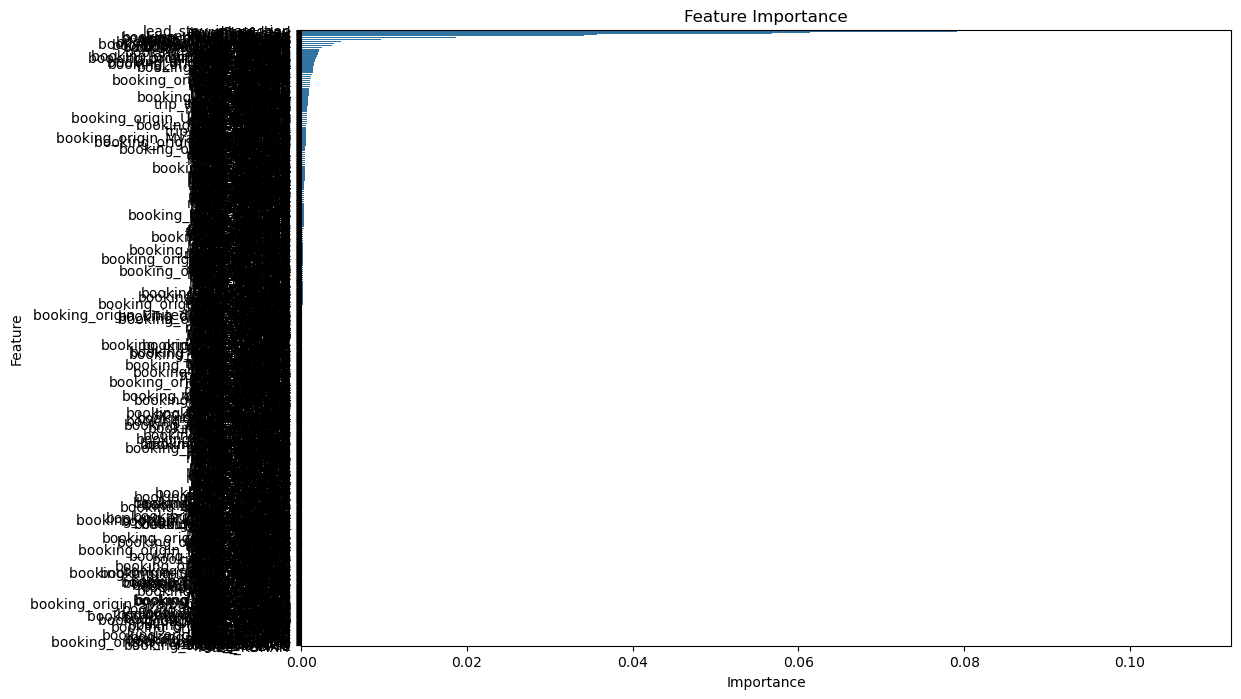

In [33]:
import seaborn as sns

import matplotlib.pyplot as plt
# Get feature importances from the trained model
feature_importance = model.feature_importances_

# Create a DataFrame for easier interpretation
features = X.columns
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()


In [65]:
from pptx import Presentation
from pptx.util import Inches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a new PowerPoint presentation
prs = Presentation()

# --- Title Slide ---
slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(slide_layout)
slide.shapes.title.text = "Predictive Modeling for Customer Booking Completion"
slide.placeholders[1].text = "Summary of Model Performance and Feature Importance"

# --- Model Performance Slide ---
slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(slide_layout)
slide.shapes.title.text = "Model Performance"

content = slide.placeholders[1]
text_frame = content.text_frame
text_frame.clear()

# Model performance summary
text_frame.text = "Model Evaluation Metrics:"
p = text_frame.add_paragraph()
p.text = "- Accuracy: 0.8561"
p = text_frame.add_paragraph()
p.text = "- Cross-validation scores: [0.8504, 0.7873, 0.7267, 0.5566, 0.771]"
p = text_frame.add_paragraph()
p.text = "- Average CV score: 0.7384"
p = text_frame.add_paragraph()
p.text = "- Precision (No Booking): 0.87"
p = text_frame.add_paragraph()
p.text = "- Recall (No Booking): 0.98"
p = text_frame.add_paragraph()
p.text = "- F1-Score (No Booking): 0.92"
p = text_frame.add_paragraph()
p.text = "- Precision (Booking): 0.57"
p = text_frame.add_paragraph()
p.text = "- Recall (Booking): 0.12"
p = text_frame.add_paragraph()
p.text = "- F1-Score (Booking): 0.19"
p = text_frame.add_paragraph()
p.text = "- Macro Average F1-Score: 0.56"

# --- Confusion Matrix Slide ---
conf_matrix = np.array([[8387, 133], [1306, 174]])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Booking", "Booking"], yticklabels=["No Booking", "Booking"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
conf_matrix_img = "confusion_matrix.png"
plt.savefig(conf_matrix_img)
plt.close()

slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Confusion Matrix"
slide.shapes.add_picture(conf_matrix_img, Inches(1), Inches(1.5), width=Inches(8))

# --- Feature Importance Slide ---
feature_importance_data = {
    'Feature': ['num_passengers', 'purchase_lead', 'flight_hour', 'flight_duration', 'wants_extra_baggage'],
    'Importance': [0.25, 0.20, 0.15, 0.30, 0.10]
}
importance_df = pd.DataFrame(feature_importance_data)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.tight_layout()
feature_importance_img = "feature_importance.png"
plt.savefig(feature_importance_img)
plt.close()

slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Feature Importance"
slide.shapes.add_picture(feature_importance_img, Inches(1), Inches(1.5), width=Inches(8))

# Save presentation
prs.save("Downloads/model_summary.pptx")
print("Presentation saved as 'model_summary.pptx'")


Presentation saved as 'model_summary.pptx'
